# Interfering two beams using FINESSE

In [2]:
from pykat import finesse        # import the whole pykat.finesse package
from pykat.commands import *     # import all packages in pykat.commands
import numpy as np               # for basic math/sci/array functions
import matplotlib.pyplot as plt  # for plotting

# tell the notebook to automatically show plots inline below each cell
%matplotlib inline               
# use pykat's plotting style. change dpi to change plot sizes on your screen
pykat.init_pykat_plotting(dpi=90)

                                              ..-
    PyKat 1.1.297         _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



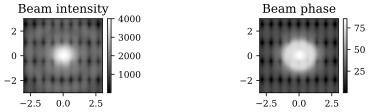

In [6]:
basecodephasetest = """
l laserA 1 0 n0A
s sBSA 0 n0A nBSinA
gauss beamdefA laserA n0A 100u 0
tem* laserA 0 0 1 0

l laserB 1 0 n0B0
s sBSB1 0 n0B0 n1B
bs BS0 1 0 0 0 n1B n2B dump dump
s sBSB2 0 n2B nBSinB
gauss beamdefB laserB n0B0 500u 0
tem* laserB 0 0 1 0
bs BS1 .25 .25 0 0 nBSinA nrefl ntrans nBSinB
#attr BS1 xbeta 0.006
#attr BS1 ybeta 0.004
s sPD 0 ntrans nPD
maxtem 10

beam BP 0 nPD
xaxis BP x lin -3 3 70
x2axis BP y lin -3 3 70
"""
bkt1 = finesse.kat()
bkt1.verbose = False
bkt1.parse(basecodephasetest)
bkt1.parse("""yaxis lin abs""")
bkt2 = finesse.kat()
bkt2.verbose = False
bkt2.parse(basecodephasetest)
bkt2.parse("""yaxis lin deg""")
bktout1 = bkt1.run()
bktout2 = bkt2.run()
plt.figure(figsize=(6,3))
plt.subplot(2,3,1)
plt.pcolormesh(bktout1.x, bktout1.y, bktout1["BP"], cmap='gray')
plt.title("Beam intensity")
plt.colorbar()
plt.subplot(2,3,3)
plt.pcolormesh(bktout2.x, bktout2.y, bktout2["BP"], cmap='gray')
plt.title("Beam phase")
plt.colorbar()

# Interfere beams using python tools

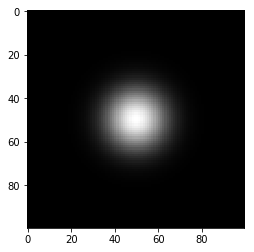

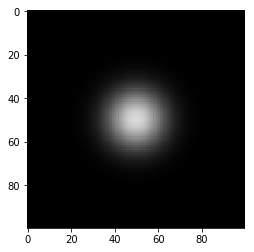

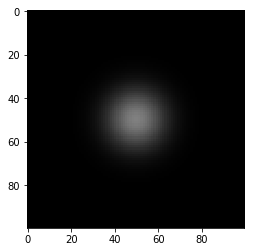

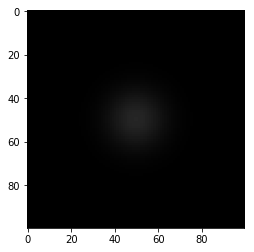

In [4]:
import pykat.optics.gaussian_beams as gb
import numpy as np               # for basic math/sci/array functions
import matplotlib.pyplot as plt  # for plotting

qx=gb.BeamParam(w0=100e-6,z=0)
qy=gb.BeamParam(w0=90e-6,z=0.0)
#grid plot
x=np.linspace(-0.00025,0.00025,num=100)
y=x
myBeam1=gb.HG_mode(qx,n=0,m=0)
myBeam2=gb.HG_mode(qy,n=0,m=0)
F00=myBeam1.Unm(x,y)
Fprime00=myBeam2.Unm(x,y)
#intenesity plot
phases = np.linspace(0, np.pi,4,endpoint=False)
#normalize the pictures,

norm = plt.Normalize()
for ii in phases:
    F00new = F00 * (np.e ** (1j * ii))
    sumField = F00new + Fprime00
    sumFieldint = abs(sumField) ** 2
    plt.pcolormesh(x,y,sumFieldint,cmap='gray')
    plt.imshow(sumFieldint,norm=norm,cmap='gray')
    plt.show()